In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [4]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')
data.sample(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
455,767-54-1907,B,Mandalay,Member,Female,Fashion accessories,29.56,5,7.3900,155.1900,2/13/2019,16:59,Cash,147.80,4.761905,7.3900,6.9
668,408-66-6712,C,Naypyitaw,Member,Female,Health and beauty,47.71,6,14.3130,300.5730,2/16/2019,14:19,Ewallet,286.26,4.761905,14.3130,4.4
483,305-18-3552,B,Mandalay,Member,Male,Home and lifestyle,60.38,10,30.1900,633.9900,2/12/2019,16:19,Cash,603.80,4.761905,30.1900,6.0
636,610-46-4100,A,Yangon,Normal,Male,Health and beauty,28.95,7,10.1325,212.7825,3/3/2019,20:31,Credit card,202.65,4.761905,10.1325,6.0


In [6]:
for col in data.columns:
    print(col)

Invoice ID
Branch
City
Customer type
Gender
Product line
Unit price
Quantity
Tax 5%
Total
Date
Time
Payment
cogs
gross margin percentage
gross income
Rating


In [9]:
### developing a correlation matrix for the data
df_cont = data.select_dtypes(include=['int64','float64'])
corr_matrix = df_cont.corr()
corr_matrix


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [13]:
corr_matrix.drop(['gross margin percentage'],axis=1,inplace=True)
corr_matrix

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


<Axes: >

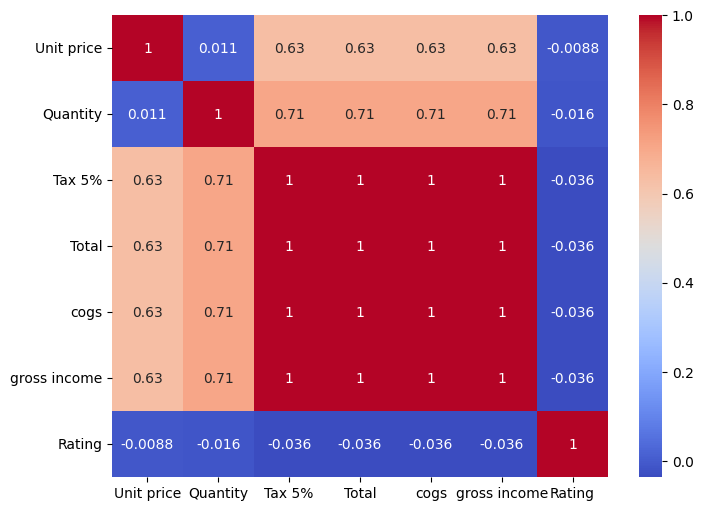

In [20]:
## Drawing a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=corr_matrix,cmap="coolwarm",annot=True)

In [22]:
## Analysing the dates in the dataset
from datetime import date
data["Date"] = pd.to_datetime(data.Date)


In [23]:
for key, value in data.dtypes.items():
    print(f"{key} ----------------> {value}")

Invoice ID ----------------> object
Branch ----------------> object
City ----------------> object
Customer type ----------------> object
Gender ----------------> object
Product line ----------------> object
Unit price ----------------> float64
Quantity ----------------> int64
Tax 5% ----------------> float64
Total ----------------> float64
Date ----------------> datetime64[ns]
Time ----------------> object
Payment ----------------> object
cogs ----------------> float64
gross margin percentage ----------------> float64
gross income ----------------> float64
Rating ----------------> float64


In [26]:
## Extracting the day od the week, year and month from the date
data["Week_day"] = data.Date.dt.day_name()
data["Week_day"]

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Week_day, Length: 1000, dtype: object

In [27]:
data.sample(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Week_day
879,761-49-0439,B,Mandalay,Member,Female,Electronic accessories,12.10,8,4.8400,101.6400,2019-01-19,10:17,Ewallet,96.80,4.761905,4.8400,8.6,Saturday
214,891-58-8335,B,Mandalay,Member,Female,Sports and travel,29.61,7,10.3635,217.6335,2019-03-11,15:53,Cash,207.27,4.761905,10.3635,6.5,Monday
178,407-63-8975,A,Yangon,Normal,Male,Food and beverages,73.88,6,22.1640,465.4440,2019-03-23,19:16,Ewallet,443.28,4.761905,22.1640,4.4,Saturday
300,446-47-6729,C,Naypyitaw,Normal,Male,Fashion accessories,99.82,2,9.9820,209.6220,2019-01-02,18:09,Credit card,199.64,4.761905,9.9820,6.7,Wednesday


In [28]:
## Extracting the month from the datetime variables
data["Month"] = data.Date.dt.month_name()
data["Month"]

0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: Month, Length: 1000, dtype: object

In [29]:
data.sample(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Week_day,Month
306,286-01-5402,A,Yangon,Normal,Female,Sports and travel,40.23,7,14.0805,295.6905,2019-03-30,13:22,Cash,281.61,4.761905,14.0805,9.6,Saturday,March
79,756-01-7507,C,Naypyitaw,Normal,Female,Health and beauty,20.38,5,5.0950,106.9950,2019-01-22,18:56,Cash,101.90,4.761905,5.0950,6.0,Tuesday,January
142,338-65-2210,C,Naypyitaw,Member,Female,Health and beauty,68.60,10,34.3000,720.3000,2019-02-05,19:57,Cash,686.00,4.761905,34.3000,9.1,Tuesday,February
220,239-36-3640,B,Mandalay,Normal,Male,Electronic accessories,45.35,6,13.6050,285.7050,2019-01-31,13:44,Ewallet,272.10,4.761905,13.6050,6.1,Thursday,January


In [30]:
data["Num_week_day"] = data.Date.dt.weekday
data["Num_week_day"]

0      5
1      4
2      6
3      6
4      4
      ..
995    1
996    5
997    5
998    4
999    0
Name: Num_week_day, Length: 1000, dtype: int32

In [37]:
data["Num_Month"] = data.Date.dt.month
data["Num_Month"]

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Num_Month, Length: 1000, dtype: int32

In [38]:
data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Week_day                           object
Month                              object
Num_week_day                        int32
Num_Month                           int32
dtype: object

In [39]:
cont_df2 = data.select_dtypes(exclude=['category','object'])
cont_df2

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,Num_week_day,Num_Month
0,74.69,7,26.1415,548.9715,2019-01-05,522.83,4.761905,26.1415,9.1,5,1
1,15.28,5,3.8200,80.2200,2019-03-08,76.40,4.761905,3.8200,9.6,4,3
2,46.33,7,16.2155,340.5255,2019-03-03,324.31,4.761905,16.2155,7.4,6,3
3,58.22,8,23.2880,489.0480,2019-01-27,465.76,4.761905,23.2880,8.4,6,1
4,86.31,7,30.2085,634.3785,2019-02-08,604.17,4.761905,30.2085,5.3,4,2
...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,2019-01-29,40.35,4.761905,2.0175,6.2,1,1
996,97.38,10,48.6900,1022.4900,2019-03-02,973.80,4.761905,48.6900,4.4,5,3
997,31.84,1,1.5920,33.4320,2019-02-09,31.84,4.761905,1.5920,7.7,5,2
998,65.82,1,3.2910,69.1110,2019-02-22,65.82,4.761905,3.2910,4.1,4,2


In [40]:
cont_df2.drop(columns=['gross margin percentage'],inplace=True)

In [41]:
corr_matrix2 = cont_df2.corr()
corr_matrix2

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross income,Rating,Num_week_day,Num_Month
Unit price,1.000000,0.010778,0.633962,0.633962,-0.006473,0.633962,0.633962,-0.008778,-0.007040,-0.027387
Quantity,0.010778,1.000000,0.705510,0.705510,-0.029563,0.705510,0.705510,-0.015815,0.054770,-0.014524
Tax 5%,0.633962,0.705510,1.000000,1.000000,-0.022899,1.000000,1.000000,-0.036442,0.038809,-0.022301
Total,0.633962,0.705510,1.000000,1.000000,-0.022899,1.000000,1.000000,-0.036442,0.038809,-0.022301
Date,-0.006473,-0.029563,-0.022899,-0.022899,1.000000,-0.022899,-0.022899,-0.043467,0.012152,0.939781
cogs,0.633962,0.705510,1.000000,1.000000,-0.022899,1.000000,1.000000,-0.036442,0.038809,-0.022301
gross income,0.633962,0.705510,1.000000,1.000000,-0.022899,1.000000,1.000000,-0.036442,0.038809,-0.022301
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.043467,-0.036442,-0.036442,1.000000,-0.013879,-0.042880
Num_week_day,-0.007040,0.054770,0.038809,0.038809,0.012152,0.038809,0.038809,-0.013879,1.000000,0.035357
Num_Month,-0.027387,-0.014524,-0.022301,-0.022301,0.939781,-0.022301,-0.022301,-0.042880,0.035357,1.000000


<Axes: >

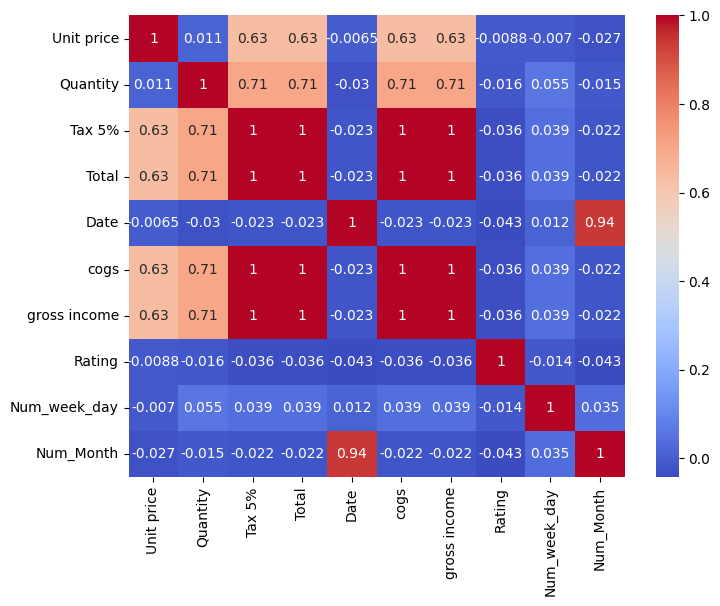

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(data=corr_matrix2,cmap="coolwarm",annot=True)

In [44]:
df = pd.read_csv('global_cancer_patients_2015_2024.csv')
df.sample(4)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
40631,PT0040631,77,Female,Australia,2024,6.7,7.3,1.2,6.0,9.7,Cervical,Stage II,22584.84,2.7,6.33
21865,PT0021865,72,Female,Russia,2020,3.2,5.1,8.5,9.0,5.5,Leukemia,Stage IV,60086.12,6.3,5.83
42899,PT0042899,45,Female,Russia,2019,8.2,6.4,6.4,6.4,1.7,Leukemia,Stage III,53310.40,8.5,5.94
11610,PT0011610,54,Other,USA,2023,8.7,0.8,4.2,9.8,3.7,Skin,Stage 0,24856.80,8.8,6.32


In [46]:
for col in df.columns:
    print(col)

Patient_ID
Age
Gender
Country_Region
Year
Genetic_Risk
Air_Pollution
Alcohol_Use
Smoking
Obesity_Level
Cancer_Type
Cancer_Stage
Treatment_Cost_USD
Survival_Years
Target_Severity_Score


In [54]:
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [55]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [56]:
for value in df['Cancer_Type'].unique():
    print(value)

Lung
Leukemia
Breast
Colon
Skin
Cervical
Prostate
Liver


In [47]:
df.dtypes

Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

In [49]:
cont_df3 = df.select_dtypes(exclude=['object'])
cont_df3.head(4)

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,2021,6.4,2.8,9.5,0.9,8.7,62913.44,5.9,4.92
1,34,2021,1.3,4.5,3.7,3.9,6.3,12573.41,4.7,4.65
2,80,2023,7.4,7.9,2.4,4.7,0.1,6984.33,7.1,5.84
3,40,2015,1.7,2.9,4.8,3.5,2.7,67446.25,1.6,3.12


In [51]:
matrix_df = cont_df3.corr()
matrix_df

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
Age,1.000000,-0.002505,0.002229,0.001101,-0.004130,0.001734,-0.002706,0.003591,-0.000147,-0.001481
Year,-0.002505,1.000000,0.009942,0.000649,0.001934,-0.006209,-0.002441,0.000061,0.000018,0.002109
Genetic_Risk,0.002229,0.009942,1.000000,-0.004492,-0.002558,-0.003718,0.003522,-0.002365,0.001708,0.478700
Air_Pollution,0.001101,0.000649,-0.004492,1.000000,0.003511,0.003549,0.006507,-0.007566,0.000893,0.366963
Alcohol_Use,-0.004130,0.001934,-0.002558,0.003511,1.000000,-0.002938,0.007425,-0.003608,-0.000527,0.363250
Smoking,0.001734,-0.006209,-0.003718,0.003549,-0.002938,1.000000,0.005828,-0.009169,0.001371,0.484420
Obesity_Level,-0.002706,-0.002441,0.003522,0.006507,0.007425,0.005828,1.000000,-0.001251,0.009771,0.251366
Treatment_Cost_USD,0.003591,0.000061,-0.002365,-0.007566,-0.003608,-0.009169,-0.001251,1.000000,-0.000429,-0.466058
Survival_Years,-0.000147,0.000018,0.001708,0.000893,-0.000527,0.001371,0.009771,-0.000429,1.000000,0.004161
Target_Severity_Score,-0.001481,0.002109,0.478700,0.366963,0.363250,0.484420,0.251366,-0.466058,0.004161,1.000000


<Axes: >

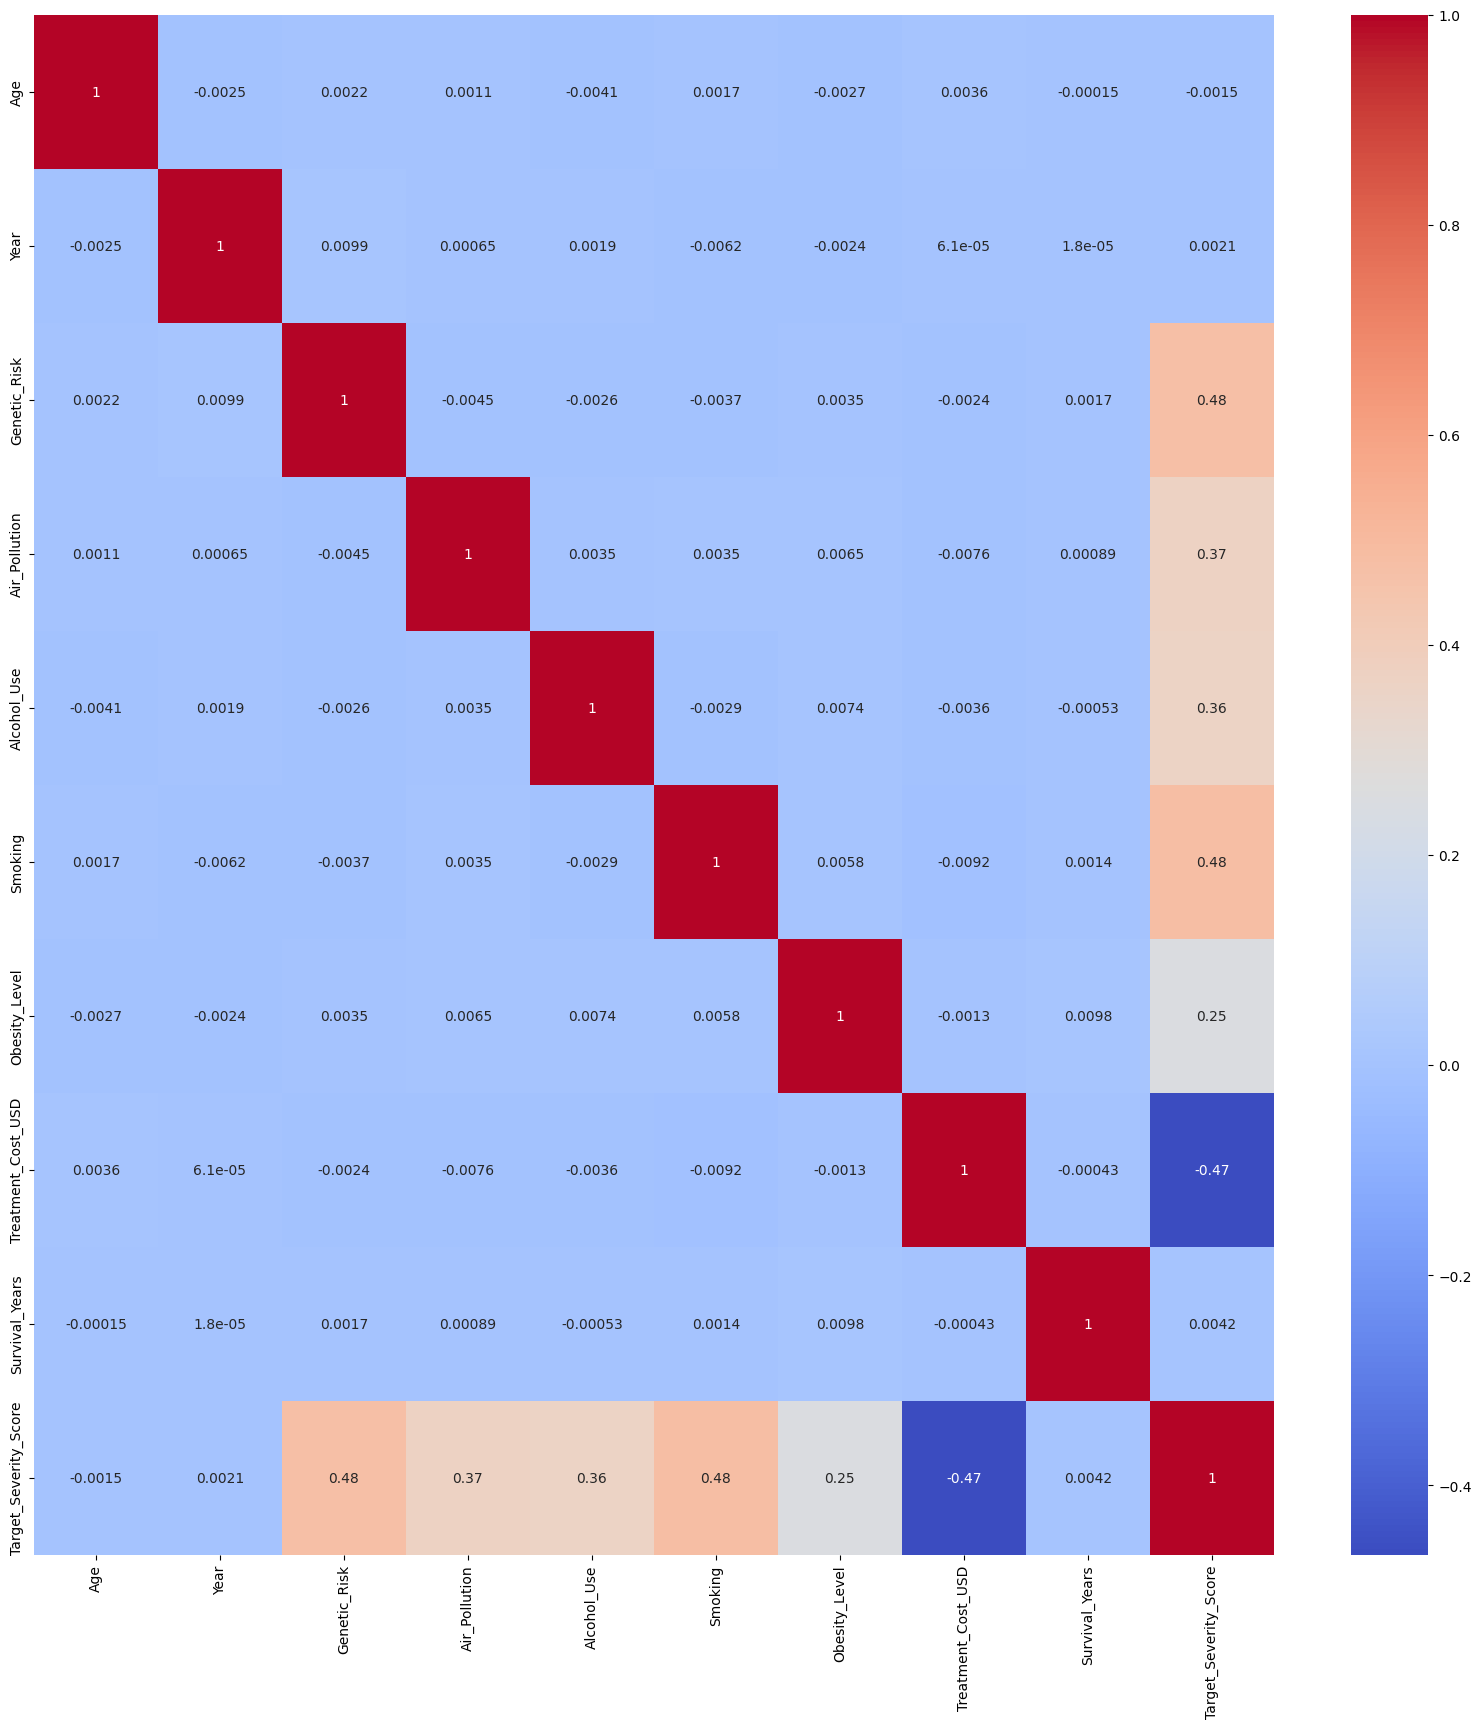

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(data=matrix_df,cmap='coolwarm',annot=True)

In [57]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [58]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [64]:
### Independent variables
x = df[['Age','Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking']]

## Dependent variable
y = df['Treatment_Cost_USD']

In [62]:
draft_df = pd.DataFrame(x)

In [63]:
draft_df

,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking
0,71,6.4,2.8,9.5,0.9
1,34,1.3,4.5,3.7,3.9
2,80,7.4,7.9,2.4,4.7
3,40,1.7,2.9,4.8,3.5
4,43,5.1,2.8,2.3,6.7
...,...,...,...,...,...
49995,80,2.3,7.5,2.8,3.8
49996,40,6.4,3.5,2.9,9.0
49997,74,6.2,1.6,8.7,4.7
49998,21,4.0,6.5,7.6,8.6


In [66]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [68]:
model.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred = model.predict(x_test)

In [75]:
df_pred = pd.DataFrame({'y_pred':y_pred,'y_test':y_test},index=None)
df_pred

,y_pred,y_test
33553,51944.023227,5410.15
9427,52978.621933,61107.99
199,51675.480832,62954.82
12447,52760.900636,61428.40
39489,52271.214863,45867.76
...,...,...
9771,52765.215955,23052.74
34737,52415.135007,5828.69
30390,52370.438279,69485.57
6797,52636.168382,76903.61


In [76]:
r2_score = r2_score(y_test,y_pred)
r2_score

-0.0005614025028670699